In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [ ]:
# AZAD JAMMU AND KASHMIR : 

Saving Azad Jammu and Kashmir_Updated.csv to Azad Jammu and Kashmir_Updated (1).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  

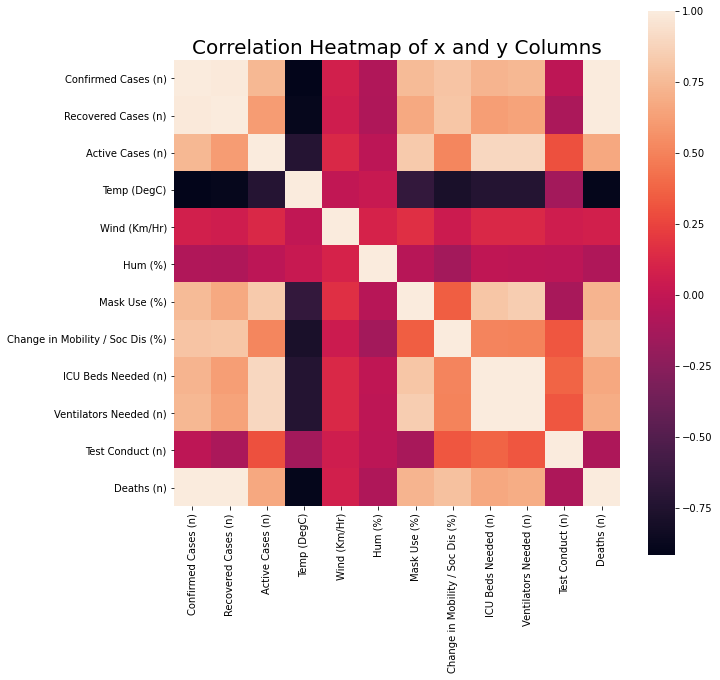

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.986231,0.739755,-0.915117,0.077383,-0.084695,0.753710,0.799224,0.725127,0.741745,-0.022859,0.993004
Recovered Cases (n),0.986231,1.000000,0.618301,-0.891171,0.058018,-0.091209,0.674850,0.807445,0.625825,0.645131,-0.099996,0.995086
Active Cases (n),0.739755,0.618301,1.000000,-0.724221,0.130798,-0.031023,0.833783,0.514855,0.900049,0.899904,0.301402,0.669908
Temp (DegC),-0.915117,-0.891171,-0.724221,1.000000,-0.009694,0.021005,-0.656053,-0.785727,-0.732498,-0.734754,-0.137141,-0.892793
Wind (Km/Hr),0.077383,0.058018,0.130798,-0.009694,1.000000,0.095895,0.167554,0.048815,0.126484,0.130961,0.059175,0.073944
Hum (%),-0.084695,-0.091209,-0.031023,0.021005,0.095895,1.000000,-0.051715,-0.139638,-0.011040,-0.018535,-0.030956,-0.091795
Mask Use (%),0.753710,0.674850,0.833783,-0.656053,0.167554,-0.051715,1.000000,0.352953,0.811860,0.846636,-0.115927,0.729416
Change in Mobility / Soc Dis (%),0.799224,0.807445,0.514855,-0.785727,0.048815,-0.139638,0.352953,1.000000,0.510267,0.499403,0.325533,0.789008
ICU Beds Needed (n),0.725127,0.625825,0.900049,-0.732498,0.126484,-0.011040,0.811860,0.510267,1.000000,0.996392,0.377910,0.666536
Ventilators Needed (n),0.741745,0.645131,0.899904,-0.734754,0.130961,-0.018535,0.846636,0.499403,0.996392,1.000000,0.323302,0.689579


In [ ]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_ajk = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_ajk.info());
print('\n')
print(df_ajk.describe())

dff = df_ajk.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [ ]:
# data pre processing 

x = df_ajk.iloc[:, 2:-1]
y = df_ajk.iloc[:, -1] 

x = x.drop(['Wind (Km/Hr)','Hum (%)','Test Conduct (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 8)
y data shape :  (183,)


x-train data shape :  (146, 8)
x-test data shape :  (37, 8)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [ ]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [151 152 155 161 164 165 169 173 173 174 175 177 181 182 182 183 186 188
 191 191 191 193 194 200 203 204 206 210 211 211 213 214 216 218 219 220
 221]

 Predicted-y using lin reg: 
 [151. 152. 155. 161. 164. 165. 169. 173. 173. 174. 175. 177. 181. 182.
 182. 183. 186. 188. 191. 191. 191. 193. 194. 200. 203. 204. 206. 210.
 211. 211. 213. 214. 216. 218. 219. 220. 221.]

Accuracy obt from lin reg model :  100.0  %


In [ ]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,433
Trainable params: 34,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 1s 2ms/step - loss: 16.3435 - mean_squared_error: 520.6513
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 4.7397 - mean_squared_error: 38.3050
Epoch 3/250
30/30 [==============================] - 0s 2ms/step - loss: 3.7117 - mean_squared_error: 21.2301
Epoch 4/250
30/30 [==========================

In [ ]:
ypred = model.predict(xts)

ya_ajk = np.array(yts)
yp_ajk = np.array(ypred)

print('\nya_ajk ~vs~ yp_ajk')
for i in range(len(yts)): 
  print(ya_ajk[[i]],'vs',yp_ajk[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_ajk[i]-yp_ajk[i])/ya_ajk[i])

err_ajk = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_ajk,2))*100,' %')


ya_ajk ~vs~ yp_ajk
[151] vs [141.74545]
[152] vs [143.63144]
[155] vs [145.8197]
[161] vs [146.6766]
[164] vs [149.90811]
[165] vs [153.63486]
[169] vs [155.44911]
[173] vs [156.35207]
[173] vs [158.37326]
[174] vs [160.01788]
[175] vs [161.56378]
[177] vs [162.85385]
[181] vs [164.4721]
[182] vs [164.91382]
[182] vs [165.63974]
[183] vs [167.85416]
[186] vs [170.62439]
[188] vs [171.47627]
[191] vs [173.79765]
[191] vs [177.25447]
[191] vs [180.59534]
[193] vs [183.88586]
[194] vs [187.41824]
[200] vs [190.70801]
[203] vs [193.68228]
[204] vs [196.39865]
[206] vs [202.16396]
[210] vs [205.46646]
[211] vs [207.71704]
[211] vs [209.0673]
[213] vs [210.3413]
[214] vs [211.82362]
[216] vs [212.80652]
[218] vs [214.25266]
[219] vs [215.0487]
[220] vs [215.37753]
[221] vs [216.30743]

Accuracy obt from deep nueral network :  94.0  %


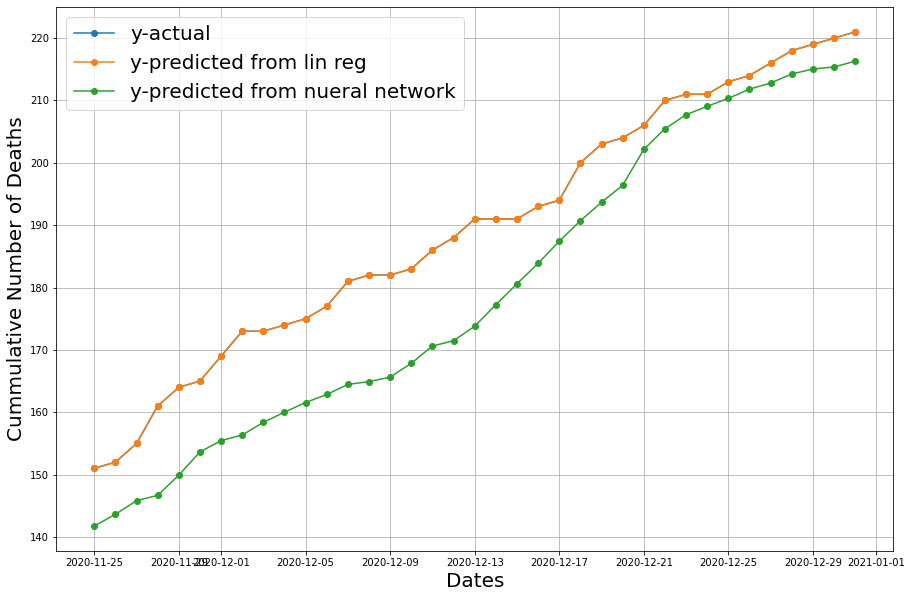

In [ ]:
dts = df_ajk['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_ajk, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_ajk, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 